Канунникова Юлия МОАД 1

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
from tqdm import tqdm

# Загружаем датасет
file_path = 'lem_dataset_W.csv'

df = pd.read_csv(file_path, header=None, names=['text'])



In [ ]:
vectorizer = CountVectorizer(max_df=0.95, min_df=5, stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['text'])


In [9]:
# Оптимальный диапазон тем
topic_range = range(5, 25)

perplexities = []
best_lda_models = {}

for n_topics in tqdm(topic_range, desc='Поиск лучшего количества тем'):
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42, n_jobs=-1, max_iter=5)
    lda.fit(X)
    perplexities.append(lda.perplexity(X))
    best_lda_models[n_topics] = lda

optimal_topics = topic_range[perplexities.index(min(perplexities))]


Поиск лучшего количества тем: 100%|█████████████| 20/20 [05:36<00:00, 16.81s/it]


In [30]:
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(topic_word_dist):
    top_words = [feature_names[i] for i in topic.argsort()[:-11:-1]]
    print(f"Тема {topic_idx}: {', '.join(top_words)}")

Тема 0: emot, studi, social, behavior, posit, effect, differ, peopl, research, prosoci
Тема 1: genet, speci, biolog, gene, use, sequenc, molecular, acid, plant, genom
Тема 2: use, method, concentr, detect, mu, measur, result, sampl, metabol, high
Тема 3: control, propos, use, power, method, base, paper, algorithm, perform, result
Тема 4: water, use, studi, area, rainwat, pollut, harvest, energi, result, increas
Тема 5: social, studi, behavior, particip, children, use, communic, effect, person, group
Тема 6: flow, use, result, model, temperatur, heat, simul, hydraul, studi, thermal
Тема 7: cell, immun, studi, il, respons, cd, stem, tissu, infect, develop
Тема 8: patient, diseas, studi, treatment, associ, clinic, use, allergi, signific, risk
Тема 9: model, use, data, method, imag, spatial, time, map, result, base
Тема 10: model, design, machin, use, process, optim, result, method, simul, paper
Тема 11: use, network, data, develop, base, paper, applic, technolog, inform, user
Тема 12: geo

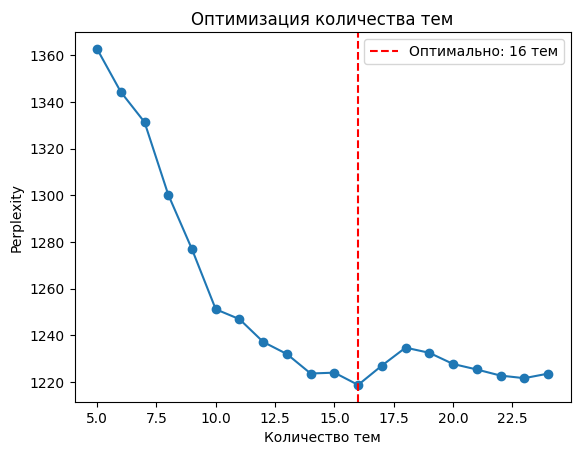

Оптимальное количество тем: 16


In [13]:
# Визуализация
plt.plot(topic_range, perplexities, marker='o')
plt.xlabel('Количество тем')
plt.ylabel('Perplexity')
plt.title('Оптимизация количества тем')
plt.axvline(optimal_topics, color='red', linestyle='--', label=f'Оптимально: {optimal_topics} тем')
plt.legend()
plt.show()

# Выводим точное количество тем
print(f'Оптимальное количество тем: {optimal_topics}')
